# Logistics Regression,Machine Learning

In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [104]:
#Reading DataFrame.
Data=pd.read_csv('Desktop/EEG0.csv')
Data.head(10)

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Activity_Name
0,139559,45567,8773,17471,24624,6556,2584,11550,Stationary
1,444535,99703,5699,22056,43233,5919,5422,11393,Stationary
2,194551,135641,22018,21954,26301,6838,5853,18788,Stationary
3,44358,65511,4610,1958,3623,10555,5731,9016,Stationary
4,35560,14786,1089,4297,4020,1390,2699,3831,Stationary
5,102978,39628,1795,2808,4602,4356,1209,2812,Stationary
6,612375,100998,19267,18902,15198,21613,9529,12111,Stationary
7,100102,9309,7601,3599,2605,4976,1271,4491,Stationary
8,4043,21502,2852,929,3216,2895,1221,698,Stationary
9,1392195,201865,32314,19425,12570,10177,5614,4414,Stationary


In [105]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Delta         8280 non-null   int64 
 1    Theta         8280 non-null   int64 
 2    Alpha1        8280 non-null   int64 
 3    Alpha2        8280 non-null   int64 
 4    Beta1         8280 non-null   int64 
 5    Beta2         8280 non-null   int64 
 6    Gamma1        8280 non-null   int64 
 7    Gamma2        8280 non-null   int64 
 8   Activity_Name  8280 non-null   object
dtypes: int64(8), object(1)
memory usage: 582.3+ KB


In [106]:
Data['Activity_Name'].unique()

array(['Stationary', 'Intense Ambulatory', 'Light Ambulatory'],
      dtype=object)

In [61]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [62]:
Data.dropna(inplace=True)

In [63]:
Data.isnull().sum()

 Delta           0
 Theta           0
 Alpha1          0
 Alpha2          0
 Beta1           0
 Beta2           0
 Gamma1          0
 Gamma2          0
Activity_Name    0
dtype: int64

In [64]:
LabelEncoder = preprocessing.LabelEncoder()

In [108]:
Data['Activity_Name'] = LabelEncoder.fit_transform(Data['Activity_Name'].astype(str))

In [109]:
X = Data.drop(['Activity_Name'],axis=1)
Y = Data['Activity_Name']
Data['Activity_Name'].unique()

array([2, 0, 1])

In [67]:
m=len(X)
m

8280

In [111]:
X.shape

(8280, 8)

In [69]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)

In [112]:
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)

# Independent Variable X

In [113]:
X

array([[-0.59501661, -0.38812185, -0.40767672, ..., -0.38359818,
        -0.5746736 ,  0.5798005 ],
       [-0.09934319, -0.14372638, -0.44987572, ..., -0.39395221,
        -0.41871285,  0.56460398],
       [-0.50563884,  0.01851473, -0.22585311, ..., -0.37901445,
        -0.39502748,  1.28038928],
       ...,
       [-0.73821736, -0.34913487, -0.22295656, ..., -0.29670232,
        -0.44113427,  0.16688094],
       [-0.31745341, -0.36560367, -0.38638503, ..., -0.4428291 ,
        -0.51570746, -0.34176703],
       [-0.60484634, -0.44387107, -0.49208845, ..., -0.45874213,
        -0.66556827, -0.41465227]])

# Dependent Variable Y

In [114]:
Y

0       2
1       2
2       2
3       2
4       2
       ..
8275    1
8276    1
8277    1
8278    1
8279    1
Name: Activity_Name, Length: 8280, dtype: int32

In [115]:
Model=LogisticRegression()

In [116]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0    Delta         8280 non-null   int64
 1    Theta         8280 non-null   int64
 2    Alpha1        8280 non-null   int64
 3    Alpha2        8280 non-null   int64
 4    Beta1         8280 non-null   int64
 5    Beta2         8280 non-null   int64
 6    Gamma1        8280 non-null   int64
 7    Gamma2        8280 non-null   int64
 8   Activity_Name  8280 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 550.0 KB


<AxesSubplot:>

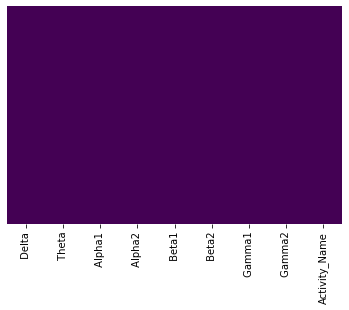

In [117]:
sns.heatmap(Data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<AxesSubplot:>

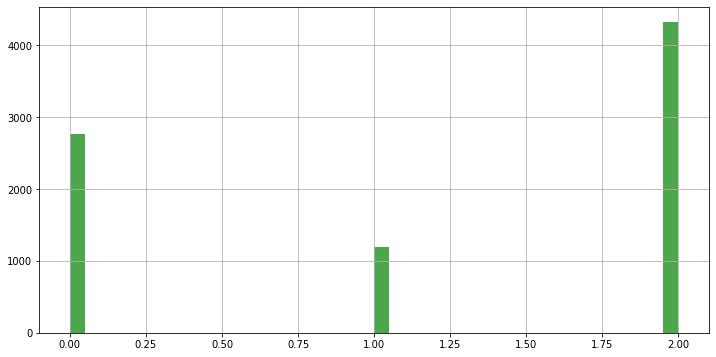

In [118]:
Data['Activity_Name'].hist(bins=40,color="green",alpha=0.7,figsize=(12,6))

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


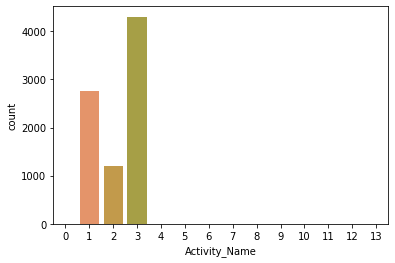

In [77]:
sns.countplot(Data['Activity_Name'],label="count")
plt.show()

In [119]:
from matplotlib import cm

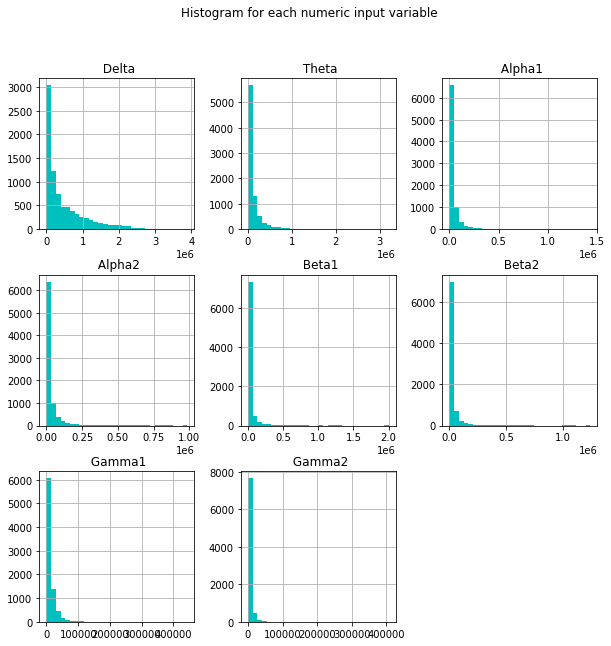

In [120]:
import pylab as pl

# To create a histogram, we will use pandas hist() method.
Data.drop('Activity_Name', axis=1).hist(bins=30, figsize=(10,10), color = "c")
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('Data_histogram')
plt.show()

In [121]:
np.any(np.isnan(X))

False

In [122]:
np.all(np.isfinite(X))

True

In [123]:
X.shape

(8280, 8)

In [124]:
Y.shape

(8280,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [126]:
fitting=Model.fit(X_train,y_train)

In [127]:
Y_prediction=Model.predict(X_test)

In [128]:
Y_prediction

array([2, 0, 0, ..., 2, 0, 0])

# Accuracy of Model=Logistic Regression

In [129]:
acc_score = round(accuracy_score(y_test, Y_prediction)*100,2)
print(acc_score,'% Accuracy')

72.64 % Accuracy


# Support Vector Machine, SVM

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn import svm

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [133]:
X_train

array([[-0.32380178, -0.30340778, -0.35008894, ..., -0.43509202,
        -0.64397117, -0.51057428],
       [-0.15533432, -0.05050252, -0.0943004 , ..., -0.28194335,
        -0.43305596, -0.13724312],
       [-0.70724265, -0.42765057, -0.51263884, ..., -0.2750515 ,
         1.09660134,  1.03685773],
       ...,
       [-0.31769232, -0.0458165 ,  0.05412367, ..., -0.26448616,
        -0.50251839, -0.03561031],
       [-0.64374595, -0.5615408 , -0.52347001, ..., -0.44858315,
        -0.54516305, -0.46905002],
       [ 0.0487578 , -0.52110467, -0.33979316, ..., -0.25057242,
         0.00861301, -0.33082941]])

In [134]:
y_train

5080    0
7244    1
3620    2
8242    1
1533    2
       ..
1295    2
693     2
1949    0
1459    2
5495    2
Name: Activity_Name, Length: 6624, dtype: int32

In [135]:
model=svm.SVC()

In [136]:
model.fit(X_train,y_train)

SVC()

In [137]:
prediction=model.predict(X_test)
prediction

array([2, 2, 2, ..., 0, 2, 2])

In [138]:
y_test

3777    2
7108    1
2166    0
2508    0
3181    0
       ..
504     2
1948    0
2943    0
2201    0
627     2
Name: Activity_Name, Length: 1656, dtype: int32

# Accuracy of Model SVM=Support Vector Machine

In [139]:
acc_score = round(accuracy_score(y_test, prediction)*100,2)
print(acc_score,'% Accuracy')

74.7 % Accuracy


# Random Forest, Machine Learning

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [142]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

# Accuracy on training Data

In [143]:
KNN.score(X_train,y_train)*100

80.79710144927536

# Accuracy on Testing Data

In [144]:
KNN.score(X_test,y_test)*100

72.04106280193237

# Navie Bayes, Machine Learning Model